# RNAge Progress Report

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML,Image
from pathlib import Path
%matplotlib inline
sns.set_style("darkgrid")
data_dir=Path("cs418-project-RNAge/data") # change
tissue_dir=Path("tissue-specific")
#!mkdir data && cp merged_meta.tsv data #Needed after cloning repo
manifest={"data":"All_Tissue_Site_Details.combined.reads.gct",
              "sample_meta":"GTEx_v7_Annotations_SampleAttributesDS.txt",
              "subject_meta":"GTEx_v7_Annotations_SubjectPhenotypesDS.txt",
               "merged_meta":"merged_meta.tsv"}

meta=pd.read_csv(data_dir/manifest['merged_meta'],sep="\t",dtype={'SMUBRID':object,'SEX':object,'DTHHRDY':object})

## Introduction

Text

## Changes

Text

## Data Cleaning

Text
Include mapping subject attributes to sample attributes with dataclass.py.

Include removing samples without age.

Include count and variance filtering.

## EDA

The objective of our EDA efforts were to explore each useful metadata field. The useful features included:
- Tissue origin (SMTS)
- Tissue sub-origin (SMTSD)
- Sex (SEX)
- Age (AGE)
- Death Classification Hardy Scale (DTHHRDY)

### Tissue origin
Our first task was to understand how many samples were from each tissue origin. This table shows how many samples are from each tissue. Interestingly, some of the lowest count tissues are sex organs. Some of the most collected tissues seem that they may have been easier to collect.

In [8]:
counts=pd.DataFrame(meta['SMTS'].value_counts())
display(counts)

,SMTS
Brain,1671
Skin,1203
Esophagus,1021
Blood Vessel,913
Adipose Tissue,797
Heart,600
Muscle,564
Blood,537
Colon,507
Thyroid,446


### Sub-tissue location
We then sought to explore how SMTSD,sub-tissue location, affects the samples. We generated PCA plots using the top 500 most variable genes following the logCPM transformation. The code for these plots can be found in `GTEx_input.R`. We found that SMTSD seems to account for the largest axis of variance for any tissue where STMSD is recorded. Representative plots from the blood and brain samples are shown.
![](progress_plots/Blood_Vessel_SMTSD_PCA.png)
![](progress_plots/Brain_SMTSD_PCA.png)

### Age
We then explored age, the primary dependent variable in our project. We found that many subjects did not have age recorded, affecting nearly 1500 samples.

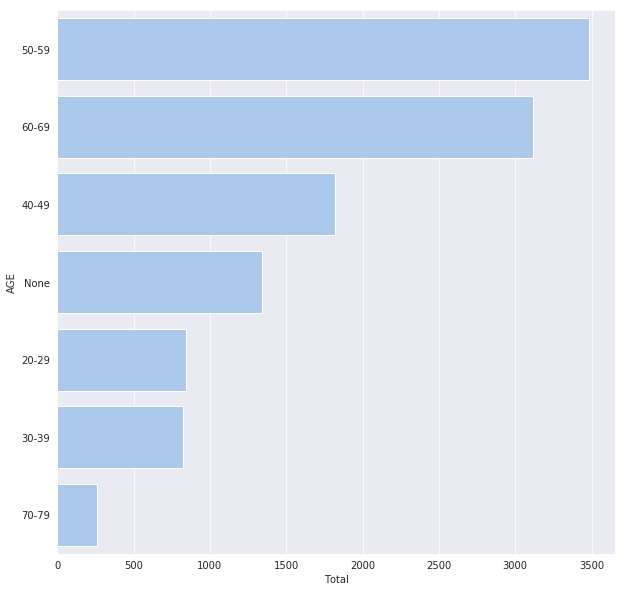

In [9]:
sns.set_color_codes("pastel")
AGE=meta['AGE'].copy()
AGE[AGE.isnull()]="None"
counts=pd.DataFrame({"AGE":AGE.value_counts()})
counts['Total']=counts['AGE']
counts['AGE']=counts.index.values
plt.figure(figsize=(10, 10))
ax=sns.barplot(x="Total", y="AGE", data=counts,
            label="Total", color="b")

### Gender
We explored the gender feature (SEX) in the same way. We found that there are many more men than women in the data set. And again, there are nearly 1500 samples with sex recorded.

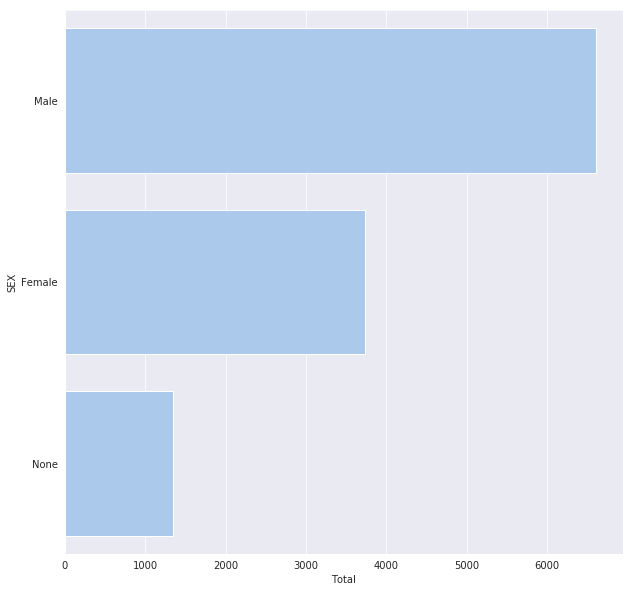

In [10]:
SEX=meta['SEX'].copy()
SEX[SEX.isnull()]="None"
counts=pd.DataFrame({"SEX":SEX.value_counts()})
counts['Total']=counts['SEX']
counts['SEX']=counts.index.values
counts['SEX'].replace({"1.0":"Male","2.0":"Female"},inplace=True)
plt.figure(figsize=(10, 10))
ax=sns.barplot(x="Total", y="SEX", data=counts,
            label="Total", color="b")

### Library size
We found that library sizes (the total number of reads sequenced and aligned into counts) were generally around 10 million, which is good, but there are some outliers for each tissue. This plot shows the distribution of library sizes for Colon samples. Code for this plot can be viewed in `perTissue_models.ipynb`.
![](progress_plots/libsizeplot.png)

### Death classification
And finally we visualized the effect of the death classification with MDS plots from `Glimma` a specialized R package which utilizes `D3.js` to visualize RNA-seq data. We created MDS plots for every tissue, but the heart is particularly representative of the trends from the metadata features. The plot below can browsed interactively **[here](progress_plots/Heart/MDS-Plot.html)**.

A selected view shows that death classification has a major effect in the second and third dimension of MDS. There appears to be major differences between samples that died by vent or quickly by natural causes. This makes intuitive sense because dying while on a vent involves hypoxia. This trend persists for most tissues.
![](progress_plots/MDS.png)

## Visualization

We knew that some tissues had very few samples. To begin testing the relationships of the data, we needed to establish a threshold of minimum number of samples per tissue. This table shows the number of people in each age group.

In [16]:
counts=pd.DataFrame(meta['SMTS'].value_counts())
df=meta[meta['SMTS'].isin(counts[counts['SMTS']>1].index)]
df=pd.crosstab(index=df['SMTS'],columns=df['AGE'])
sorted_i=df.sum(axis=1).sort_values(ascending=False).index.values
df=df.loc[sorted_i,:]
display(df)

AGE,20-29,30-39,40-49,50-59,60-69,70-79
SMTS,,,,,,
Skin,98,94,200,398,377,35
Esophagus,102,91,191,356,258,23
Blood Vessel,75,75,160,310,273,20
Adipose Tissue,57,66,131,273,245,25
Heart,33,29,95,220,205,18
Muscle,46,45,88,188,179,18
Blood,50,46,103,169,163,6
Colon,45,48,95,164,140,15
Thyroid,30,29,81,151,143,12


### Differential Gene Expression
We also wanted to test whether there was differential gene expression (DGE) on the basis of subject age for any tissue. This was done for all tissues, but the results from the Pancreas will be seen here.

Specifically, we tested $LA vs. HA = \frac{(A1+A2+A3)}{3}-\frac{(A4+A5+A6)}{3}$ where LA means low-age and HA means high age, and where our null hypothesis for each gene was there is no difference in the gene expression between the two populations.

Unfortunately, there are no tools in Python to accomplish the mean-dispersion estimation/transformation needed to run statistical tests on RNA-seq count data. Instead, we used `R` and the `edgeR`, `Limma`, and `Glimma` packages. The code to run DGE can be found in `GTEx_DGE_AGE.R`.
The edgeR → Limma pipeline is unique insofar that it transforms the right-skewed and heteroskedastic count data into a normal distribution for traditional linear methods. 

This process is called voom and can be seen in the following two plots, one from before and after the transformation.
![](progress_plots/Pancreas/Init_SA.png)
![](progress_plots/Pancreas/Final_SA.png)

The high dispersion outliers are generally sexually dimorphic genes. This trend occurs to some degree for most tissues. This impacted the normalization and DGE process and indicates it may be a good idea to only work with male samples.

### DGE Results - Pancreas

Differential expression analysis in edgeR and Limma involves fitting a linear model to the normalized data to better estimate the dispersion of each gene. This pooled dispersion is then used in the computation of a *moderated* t-statistic between the test groups

In general, we did not detect differential expression when the lowest three age groups were compared with the highest three age groups. Many genes were marginally differentially expressed, but the BH multiple hypothesis testing correction meant that very few genes were statistically significantly differentially expressed. 

Below is a snapshot of the MD plot, which plots mean expression vs. log-fold change between the groups. Usually, differentially expressed genes are highlighted in color, but there are none in this case. This interactive plot can be viewed [here](progress_plots/Pancreas/MD-Plot.html).
![](progress_plots/MD.png)

Visually, there were trends in some genes the seemed to reflect a trend based on age. A strip chart for one such gene can be seen below. For each tissue, there were a handful of anecdotally significant genes with functions relevant to the tissue. For example, the pancreas is a major extracellular exporter, and this gene which appears to be differentially expressed has to do with the Golgi apparatus.
![](progress_plots/MD_full.png)

## ML

Text

## Reflection

- The size of the data has been extremely prohibitive. The transformed counts are floats, which take much more space. It is best to compute the cpm transformation on the entire data set, meaning that we had to create these floats all in R before moving to Python.

## Next Steps

Text